In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

import statsmodels.api as sm
import pylab

from functions import *

In [17]:
data = pd.read_excel('data.xlsx')

In [18]:
random.seed(240)
data = data.loc[(data['drug_name'] == 'Gemcitabine') & (data['cell_line'] == 'OCUBM')][['Drug_concentration (µM)',
                                                                               'viability1', 'viability2', 'viability3', 'viability4', 'viability5','viability6']]
#data.reset_index(drop=True)

X = np.log10(sum([data['Drug_concentration (µM)'].values.tolist()]*6,[]))
y= sum([data.iloc[:,i].values.tolist() for i in range(1,7)],[])

df = pd.DataFrame({'y':y,'X':X })

h= 0.2

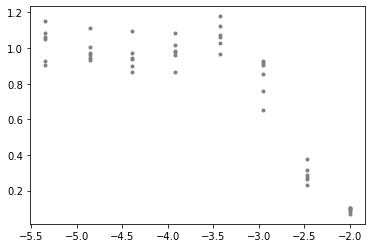

In [19]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, y, 'o', color='grey',markersize=3)

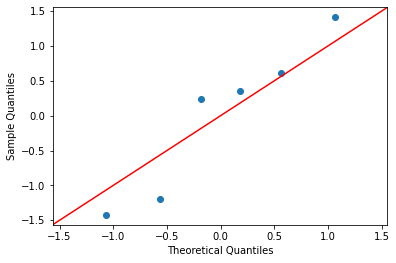

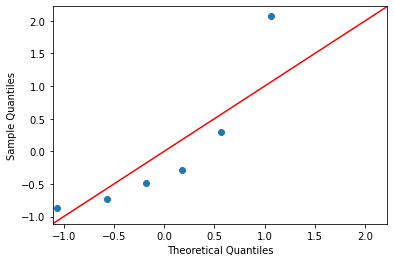

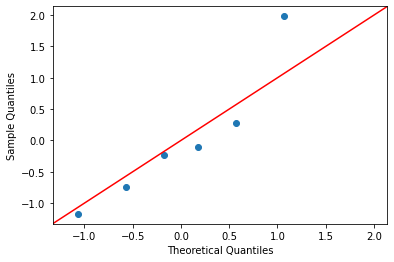

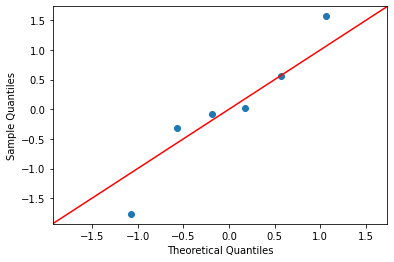

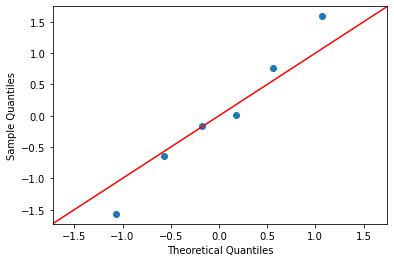

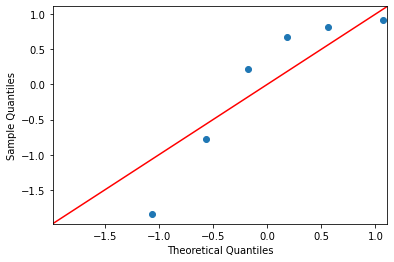

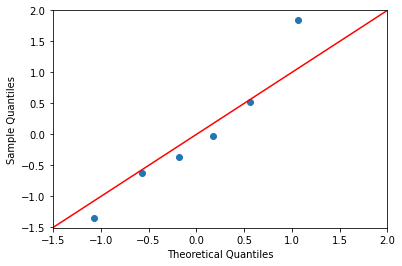

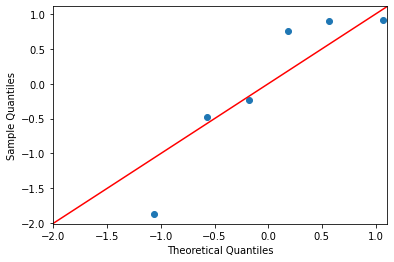

In [23]:
y_batch = []

for x in df.X.unique():
    #print(x)
    y_batch.append(df.loc[df.X ==x].y.values)
    
for y in y_batch:
    sm.qqplot(preprocessing.scale(y), line='45')

In [24]:
new_y_batch = []

new_x_batch = []

for x,y in zip(df.X.unique(),y_batch):
    new_x_batch.append([x]*50)
    new_y_batch.append(np.random.normal(loc=np.mean(y), scale=np.std(y), size=50).tolist())  

In [25]:
### Generate additional data 

In [26]:
df_boot = pd.DataFrame({'y':sum(new_y_batch, []),'X':sum(new_x_batch, [])})

In [27]:
df = pd.concat([df,df_boot])

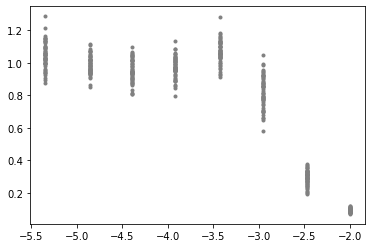

In [28]:
fig, ax = plt.subplots(1, 1)
ax.plot(df.X, df.y, 'o', color='grey',markersize=3)

In [29]:
omega = bernoulli.rvs(pi(df.y,1,1), size=len(df))

In [30]:
pi_hat = [pi_hat(h,z,df.y,pi(df.y,1,1),omega) for z in np.linspace(-1.5, 1.5, len(df))]


Prior Z-Scoring before fit


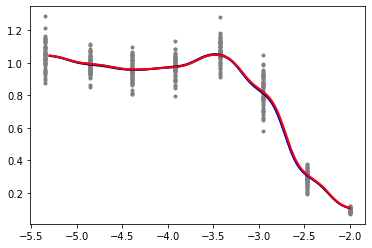

In [33]:
print('Prior Z-Scoring before fit')

fig, ax = plt.subplots(1, 1)
ax.plot(df.X, df.y, 'o', color='grey',markersize=3)

#NW
ax.plot(np.linspace(-5.3, -2, len(df)),[nw(h,t,df.X,df.y) for t in np.linspace(-5.3, -2,len(df))],color= 'black', lw=2)
#HT NW
ax.plot(np.linspace(-5.3, -2, len(df)),[nw_mis(h,t,df.X,df.y,pi(df.y,1,1),omega) for t in np.linspace(-5.3, -2, len(df))],'-g',color= 'blue', lw=2)
#
ax.plot(np.linspace(-5.3, -2, len(df)),[nw_mis(h,t,df.X,df.y,pi_hat,omega) for t in np.linspace(-5.3, -2, len(df))],'-g',color= 'red', lw=2)
